# Plot the Results of SA and QA with $N_\text{tot} =2N_\text{bit}^2 + 1$  and $N_\text{bit} =12$ 

In [1]:
from functions_SFMA import *
np.set_printoptions(threshold=10, linewidth=9999)

In [2]:
# Variables of files
n_bit = 12 # number of spins (qubits)
val_dim = f'd{n_bit}'
n_in = n_bit # size of the initial dataset 
kFM = int(n_bit/2)-1 # hyperparameter for a FM model 
val_k = str(kFM)
val_standard = "standard"
val_SA = 'SA'
val_QA = 'QA'
n_samp = 30
val_samp = f'samp{n_samp}'
nrep_it = 2 # number of sampling of FMA (SFMA)
n_it = pow(n_bit,2) # unit of the number of iterations of FMA (SFMA)
n_it_tot = int(n_it*nrep_it) # total number of the iterations
n_tot = n_in + 1 + n_it_tot # sizes of the final datasets
val_n_tot = str(n_tot)
l_rate = n_tot - n_bit # sizes of rates

# Labels and colors for plots
list_label = ["S-SFMA (R=0.4, SA)", "S-SFMA (R=0.4, QA)"] # labels of the algorithms 
list_color = ["red", "deepskyblue"] # colors for plots

# Specify the folders for saving the figures of the results. 
folder_data =  f'final_data_file_{n_bit}' # folder for the inital and output datasets  
folder_mean = f'final_SFMA_results_mean_{n_bit}_SA_and_QA' # folder for the plots of mean
folder_rate = f'final_SFMA_results_rate_{n_bit}_SA_and_QA' # folder for the plots of success rate

# font sizes
x_fontsize = 18
y_fontsize = 18
title_fontsize = 18
legend_fontsize = 16

## Plot the results of mean

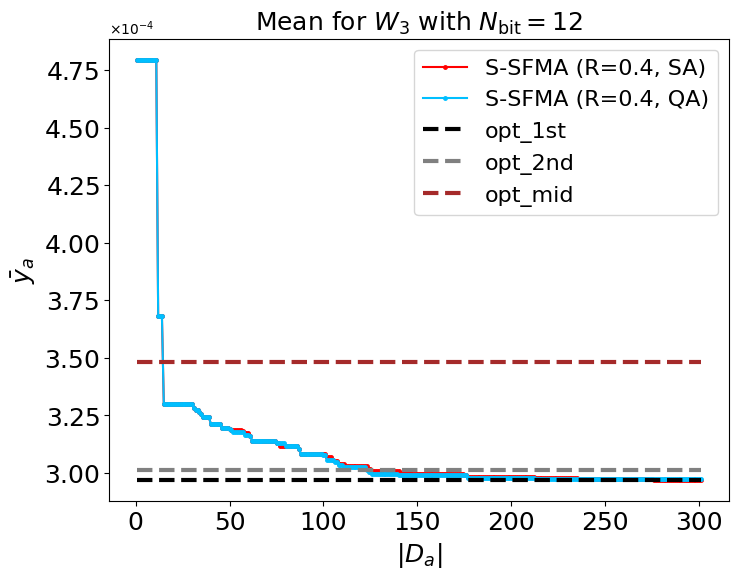

In [3]:
# Load the files and plot the results.
num_W = 3 # the index of a target W matrix
val_num_W = f'W_{num_W}'
######### Load standardized results of SA.
file_standard_SA =f'{folder_data}/result_{val_num_W}_{val_dim}_{val_k}_{val_SA}_{val_samp}_{val_n_tot}_{val_standard}.bz2'
with open(file_standard_SA, 'rb') as fl_standard_SA:
        result_standard_SA = pickle.load(fl_standard_SA) 
######### Load standardized results of QA.
file_standard_QA =f'{folder_data}/result_{val_num_W}_{val_dim}_{val_k}_{val_QA}_{val_samp}_{val_n_tot}_{val_standard}.bz2'
with open(file_standard_QA, 'rb') as fl_standard_QA:
        result_standard_QA = pickle.load(fl_standard_QA) 

######### Rounded means (17 decimal places)
ys_mean_sub_standard_SA = result_standard_SA['ys_mean_sub_rounded'] # sampled (R=0.4), SA
ys_mean_sub_standard_QA = result_standard_QA['ys_mean_rounded'] # sampled (R=0.4), QA
opt_1st = result_standard_SA['opt_1st_rounded'] # opt_1st 
opt_2nd = result_standard_SA['opt_2nd_rounded'] # opt_2nd
opt_mid2 = result_standard_SA['opt_mid2_rounded'] # opt_mid2 

#### Plot means.
list_mean = [ys_mean_sub_standard_SA,ys_mean_sub_standard_QA] # list of means
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
for a in range(len(list_mean)):
    ax.plot(
    range(1, n_tot+1),
    list_mean[a],
        marker=".",
        markersize = 5,
        linestyle="-",
        label=list_label[a],
        color=list_color[a]
        )
ax.plot(
        range(1, n_tot+1),
        opt_1st,
        linewidth=3,
        linestyle="--",
        label='opt_1st',
        color="black",
        )
ax.plot(
        range(1, n_tot+1),
        opt_2nd,
        linewidth=3,
        linestyle="--",
        label='opt_2nd',
        color="grey",
        )

ax.plot(
    range(1, n_tot+1),
    opt_mid2,
    linewidth=3,
    linestyle="--",
    label='opt_mid',
    color="brown",
    )

ax.set_xlabel('$|D_a|$', fontsize=x_fontsize)
ax.set_ylabel(r'$\bar{y}_a$', fontsize=y_fontsize)
ax.set_title(rf'Mean for $W_{num_W}$ with $N_{{\mathrm{{bit}}}} = {n_bit}$', fontsize=title_fontsize)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',  axis='y',scilimits=(0,0))
ax.tick_params(labelsize=18)
ax.legend(fontsize=legend_fontsize)

# Create the result file and save it in the specified folder.

file_path_mean = os.path.join(folder_mean, f'mean_{val_num_W}_{n_bit}_{val_SA}_and_{val_QA}.png') # save the figure as a png file
os.makedirs(folder_mean, exist_ok=True) # create the folder if it doesn't exist
fig.savefig(file_path_mean, format='png', bbox_inches='tight') # save the figure as a png file in the specified folder



## Plot the results of rounded success rate

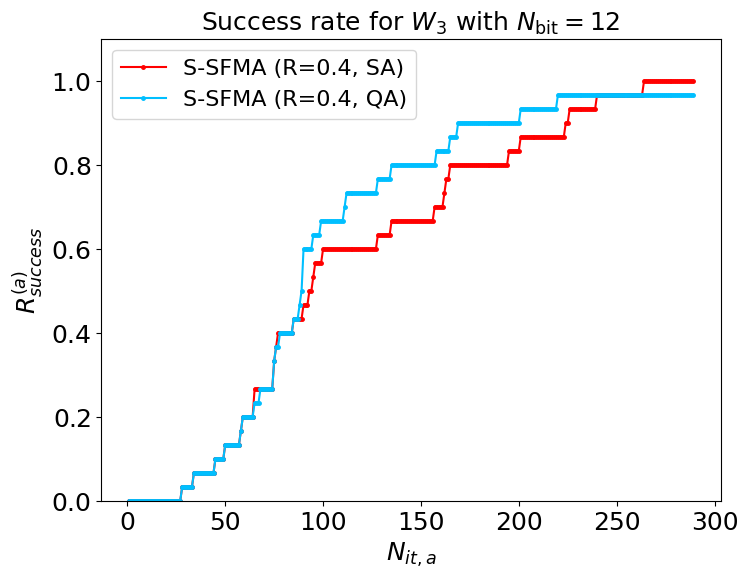

In [4]:
# Rates
rate_sub_standard_SA = result_standard_SA['rate_sub_rounded'] # sampled (R=0.4), SA
rate_sub_standard_QA = result_standard_QA['rate_rounded'] # sampled (R=0.4), QA
    
#### Plot the success rates.
list_rate_rounded = [rate_sub_standard_SA,rate_sub_standard_QA] # list of rates

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
for a in range(len(list_rate_rounded)):
    ax.plot(
    range(1, l_rate+1),
    list_rate_rounded[a],
    marker=".",
    markersize = 5,
    linestyle="-",
    label=list_label[a],
    color=list_color[a]
        )

plt.ylim(0, 1.1)
ax.set_xlabel('$N_{it,a}$', fontsize=x_fontsize)
ax.set_ylabel('$R_{success}^{(a)} $', fontsize=y_fontsize)
ax.set_title(rf'Success rate for $W_{num_W}$ with $N_{{\mathrm{{bit}}}} = {n_bit }$', fontsize=title_fontsize)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',  axis='y',scilimits=(0,0))
ax.tick_params(labelsize=18)
ax.legend(fontsize=legend_fontsize)

# Create the result file and save it in the specified folder.

file_path_rate = os.path.join(folder_rate, f'success_rate_{val_num_W}_{n_bit}_{val_SA}_and_{val_QA}.png') # save the figure as a png file
os.makedirs(folder_rate, exist_ok=True) # create the folder if it doesn't exist
fig.savefig(file_path_rate, format='png', bbox_inches='tight') # save the figure as a png file in the specified folder



## Analyze N_cov and the final success rate for $W_3$

In [5]:
# Print N_conv.
print('N_conv:')
N_conv_sub_standard_SA = find_min_location(rate_sub_standard_SA, 0.5) # sampled (R=0.4), SA
N_conv_sub_standard_QA = find_min_location(rate_sub_standard_QA, 0.5) # sampled (R=0.4), QA
print(val_num_W,  "sub_SA:", N_conv_sub_standard_SA, "sub_QA:", N_conv_sub_standard_QA)

# Print final rates.
print('final ratio:')                        
print(val_num_W,list_label[0],list_rate_rounded[0][l_rate-1]*n_samp,list_label[1],list_rate_rounded[1][l_rate-1]*n_samp) # final ratio

N_conv:
W_3 sub_SA: 92 sub_QA: 88
final ratio:
W_3 S-SFMA (R=0.4, SA) 30.0 S-SFMA (R=0.4, QA) 29.0
